In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# 1. Missing value Treatment 

advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# 2. Multicollineartity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = advertising[['TV','Radio','Newspaper']]
vif_data= pd.DataFrame()
vif_data["features"] = x.columns
                
vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
 
print(vif_data) 

    features       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [6]:
# 3. Univaraite analysis 

advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Newspaper'>

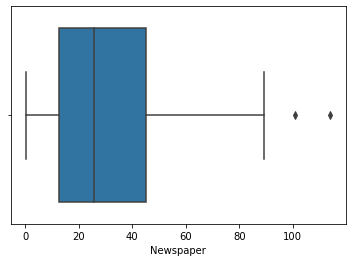

In [7]:
sns.boxplot(advertising['Newspaper'])

In [8]:
advertising = advertising[advertising['Newspaper'] < 100 ]

In [9]:
advertising.shape

(198, 4)

<AxesSubplot:xlabel='Newspaper'>

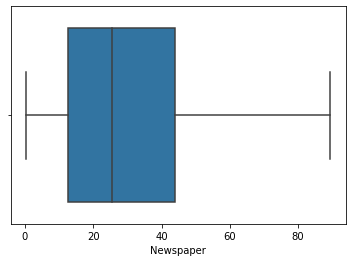

In [10]:
sns.boxplot(advertising['Newspaper'])

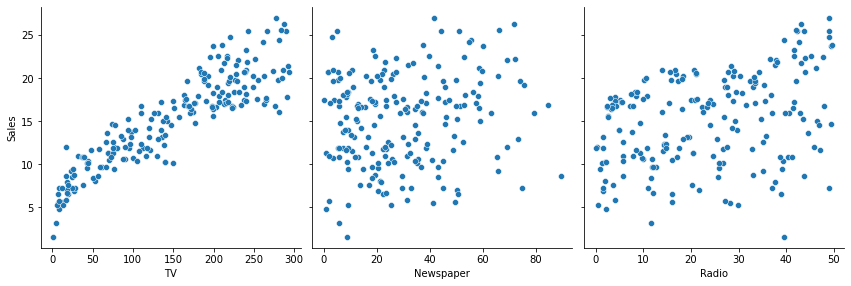

In [11]:
# 4.Bivariate analysis 
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()



In [12]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
# 5. Creating two data 
X = advertising[['TV','Radio']]
y = advertising['Sales']

In [14]:
X.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [15]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)


In [17]:
X_train.shape

(148, 2)

In [18]:
X_test.shape

(50, 2)

In [19]:
# 6 .model building 

# model 1 . Sales = F(TV)
# model 2 . sales = F(TV + Radio)
# model 3. sales = F(TV+Radio+newspaper)

In [20]:
# model_1
X_train

,TV,Radio
187,191.1,28.7
43,206.9,8.4
68,237.4,27.5
195,38.2,3.7
76,27.5,1.6
...,...,...
108,13.1,0.4
14,204.1,32.9
93,250.9,36.5
181,218.5,5.4


In [21]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

X_train_sm

,const,TV,Radio
187,1.0,191.1,28.7
43,1.0,206.9,8.4
68,1.0,237.4,27.5
195,1.0,38.2,3.7
76,1.0,27.5,1.6
...,...,...,...
108,1.0,13.1,0.4
14,1.0,204.1,32.9
93,1.0,250.9,36.5
181,1.0,218.5,5.4


In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     596.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.03e-70
Time:                        22:48:22   Log-Likelihood:                -288.45
No. Observations:                 148   AIC:                             582.9
Df Residuals:                     145   BIC:                             591.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8447      0.349     13.870      0.0

In [23]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     596.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.03e-70
Time:                        22:48:22   Log-Likelihood:                -288.45
No. Observations:                 148   AIC:                             582.9
Df Residuals:                     145   BIC:                             591.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8447      0.349     13.870      0.0

In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     596.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.03e-70
Time:                        22:48:22   Log-Likelihood:                -288.45
No. Observations:                 148   AIC:                             582.9
Df Residuals:                     145   BIC:                             591.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8447      0.349     13.870      0.0

In [25]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     596.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.03e-70
Time:                        22:48:22   Log-Likelihood:                -288.45
No. Observations:                 148   AIC:                             582.9
Df Residuals:                     145   BIC:                             591.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8447      0.349     13.870      0.0

In [26]:
#Sales = 4.64 + 0.05(TV) + 0.10(Radio)

In [27]:
y_test

66     11.0
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    20.0
160    16.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      15.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    16.9
119     6.6
177    16.7
70     18.3
77     14.2
127    11.9
83     13.6
25     17.0
193    19.6
97     20.5
173    16.7
20     18.0
152    16.6
139    20.7
5       7.2
67     13.4
140    10.9
106     7.2
172     7.6
99     17.2
113    20.9
12      9.2
36     25.4
Name: Sales, dtype: float64

In [28]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,TV,Radio
66,1.0,31.5,24.6
116,1.0,139.2,14.3
17,1.0,281.4,39.6
143,1.0,104.6,5.7
158,1.0,11.7,36.9
128,1.0,220.3,49.0
142,1.0,220.5,33.2
31,1.0,112.9,17.4
19,1.0,147.3,23.9
169,1.0,284.3,10.6


In [29]:
y_pred = lr.predict(X_test_sm)

In [30]:
y_pred

66      9.119808
116    13.755840
17     23.989330
143    11.007458
158     9.367648
128    21.735233
142    20.075518
31     12.685557
19     15.201300
169    21.077656
160    15.927673
15     20.274209
56      8.203440
57     14.114391
117     8.990432
46     10.659446
126     9.371775
9      15.740207
149     9.948333
86     11.807791
115    12.536890
163    17.426196
61     23.248616
189     7.117931
74     18.788932
69     21.010024
121     8.138141
165    17.669304
119     7.567441
177    14.716516
70     18.663106
77     14.263016
127     9.107851
83     13.185066
25     19.189514
193    18.151346
97     16.893393
173    14.546832
20     19.382440
152    17.811629
139    19.314339
5      10.476797
67     13.782300
140    10.543598
106     7.336526
172     8.011517
99     16.439893
113    18.164066
12      9.820546
36     23.662581
dtype: float64

In [31]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.9233579214065604

In [32]:
0.89 

0.84 

0.85


0.85

In [37]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     596.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.03e-70
Time:                        22:50:14   Log-Likelihood:                -288.45
No. Observations:                 148   AIC:                             582.9
Df Residuals:                     145   BIC:                             591.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8447      0.349     13.870      0.0

In [41]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     596.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           1.03e-70
Time:                        22:51:32   Log-Likelihood:                -288.45
No. Observations:                 148   AIC:                             582.9
Df Residuals:                     145   BIC:                             591.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8447      0.349     13.870      0.0

In [42]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.9233579214065604

In [43]:
X_test.head()

,TV,Radio
66,31.5,24.6
116,139.2,14.3
17,281.4,39.6
143,104.6,5.7
158,11.7,36.9


In [44]:
y_test.head()

66     11.0
116    12.2
17     24.4
143    10.4
158     7.3
Name: Sales, dtype: float64

In [45]:
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

y_pred.head()

66      9.119808
116    13.755840
17     23.989330
143    11.007458
158     9.367648
dtype: float64

In [46]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.9233579214065604

# Thankyou